### Question 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creating Dataset

In [7]:
data_dict = {
    "Points": [
        18.0, 19.0, 14.0, 14.0, 11.0, 
        20.0, 28.0, 30.0, 31.0, 35.0, 
        33.0, 25.0, 25.0, 27.0, 29.0, 
        30.0, 19.0, 23.0
    ],
    "Assists": [
        3.0, 4.0, 5.0, 4.0, 7.0, 
        8.0, 7.0, 6.0, 9.0, 12.0, 
        14.0, 9.0, 4.0, 3.0, 
        4.0, 12.0, 15.0, 11.0
    ],
    "Rebounds": [
        15, 14, 10, 8, 14, 
        13, 9, 5, 4, 11, 
        6, 5, 3, 8, 12, 
        7, 6, 5
    ]
}

df = pd.DataFrame(data_dict)
print(df)

    Points  Assists  Rebounds
0     18.0      3.0        15
1     19.0      4.0        14
2     14.0      5.0        10
3     14.0      4.0         8
4     11.0      7.0        14
5     20.0      8.0        13
6     28.0      7.0         9
7     30.0      6.0         5
8     31.0      9.0         4
9     35.0     12.0        11
10    33.0     14.0         6
11    25.0      9.0         5
12    25.0      4.0         3
13    27.0      3.0         8
14    29.0      4.0        12
15    30.0     12.0         7
16    19.0     15.0         6
17    23.0     11.0         5


## Defining function for K-means

In [8]:
import numpy as np

def k_means_clustering(X, k):
    n, d = X.shape

    # If k is 1, return one center as the mean of all points
    if k == 1:
        center = np.mean(X, axis=0)
        labels = np.zeros(n, dtype=int)  # All points assigned to one cluster
        return labels, center  # Return labels and center

    # Initialize centers by selecting the first k points from X
    centers = X[:k]

    while True:
        # Step 1: Assign each point to the nearest center
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Recalculate centers as the mean of each cluster
        new_centers = []
        for i in range(k):
            # Calculate the mean only if there are points assigned to the cluster
            if np.any(labels == i):
                new_center = X[labels == i].mean(axis=0)
            else:
                # If no points are assigned, keep the old center or handle as needed
                new_center = centers[i]
            new_centers.append(new_center)

        new_centers = np.array(new_centers)

        # Check for convergence (if centers don't change, stop)
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return labels, centers  # Return labels and centers


In [11]:
X = np.array(df.values.tolist())

### For K = 1

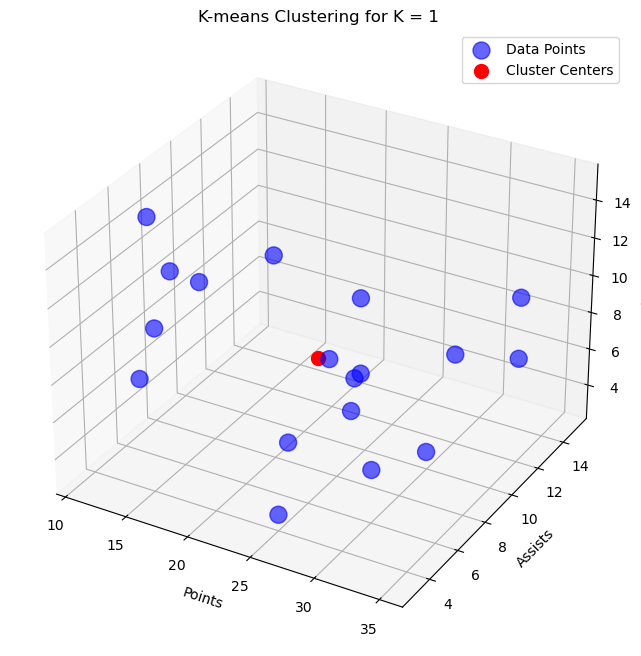

In [12]:
labels,centers = k_means_clustering(X,k=1)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(df["Points"], df["Assists"], df["Rebounds"], c='blue',s=150, label='Data Points', alpha=0.6)

# Scatter plot of the cluster centers
ax.scatter(centers[0], centers[1], centers[2], c='red' , s=100, label='Cluster Centers')

# Adding labels and title
ax.set_title('K-means Clustering for K = 1')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### For K = 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


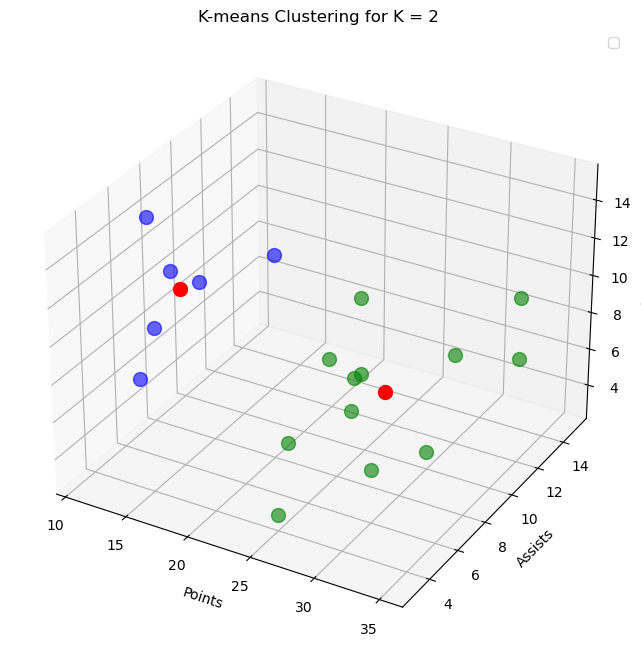

In [13]:
labels,centers = k_means_clustering(X,k=2)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 0:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 2')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### For K = 3 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


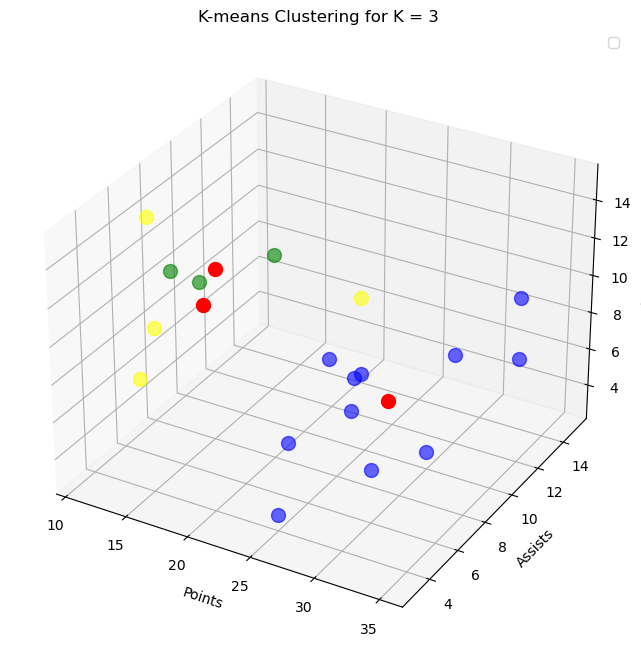

In [32]:
labels,centers = k_means_clustering(X,k=3)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 2:
        ax.scatter(point[0], point[1], point[2], c='yellow' , s=100,alpha=0.6)
    elif label == 1:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

# Scatter plot of the cluster centers
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 3')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### For K = 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


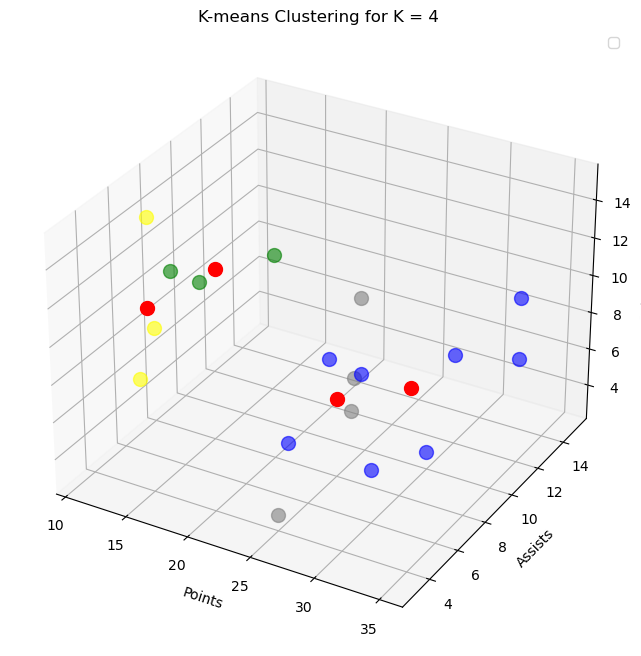

In [33]:
labels,centers = k_means_clustering(X,k=4)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 3:
        ax.scatter(point[0], point[1], point[2], c='gray' , s=100,alpha=0.6)
    elif label == 2:
        ax.scatter(point[0], point[1], point[2], c='yellow' , s=100,alpha=0.6)
    elif label == 1:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

# Scatter plot of the cluster centers
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 4')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

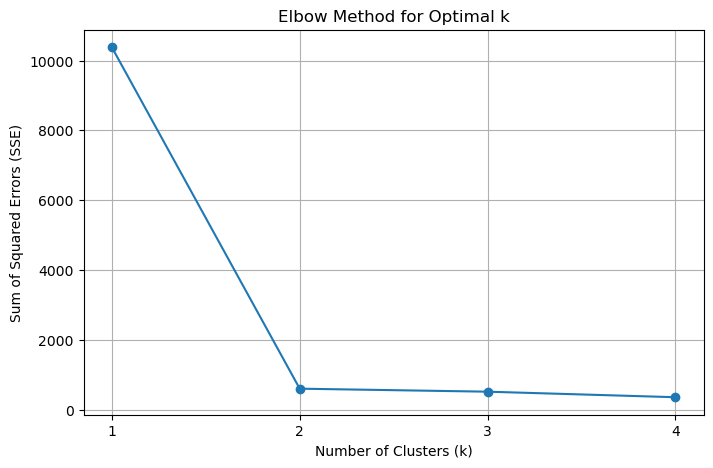

In [17]:
def calculate_sse(centers, labels, X):
    sse = 0
    for i, point in enumerate(X):
        center = centers[labels[i]]
        sse += np.sum((point - center) ** 2)
    return sse

k_values = range(1, 5)
sse_values = []

for k_value in k_values:
    labels,centers = k_means_clustering(X, k=k_value)
    sse = calculate_sse(centers, labels, X)
    sse_values.append(sse)

    # Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Using Manhattan distance

In [21]:
def manhattan_distance(X, centers):
    return np.sum(np.abs(X[:, np.newaxis] - centers), axis=2)

def k_means_manhattan(X, k):
    n, d = X.shape

    while True:
        # Step 1: Assign each point to the nearest center using Manhattan distance
        distances = manhattan_distance(X, centers)
        labels = np.argmin(distances, axis=1)

        # Step 2: Recalculate centers as the mean of each cluster
        new_centers = []
        for i in range(k):
            if np.any(labels == i):
                new_center = X[labels == i].mean(axis=0)
            else:
                new_center = centers[i]  # Keep old center if no points assigned
            new_centers.append(new_center)

        new_centers = np.array(new_centers)

        # Check for convergence
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return labels, centers  # Return labels and centers

### Using Minkowski distance

In [20]:
def minkowski_distance(X, centers, p):
    return np.sum(np.abs(X[:, np.newaxis] - centers) ** p, axis=2) ** (1 / p)

def k_means_minkowski(X, k, p=2):
    n, d = X.shape

    while True:
        # Step 1: Assign each point to the nearest center using Minkowski distance
        distances = minkowski_distance(X, centers, p)
        labels = np.argmin(distances, axis=1)

        # Step 2: Recalculate centers as the mean of each cluster
        new_centers = []
        for i in range(k):
            if np.any(labels == i):
                new_center = X[labels == i].mean(axis=0)
            else:
                new_center = centers[i]  # Keep old center if no points assigned
            new_centers.append(new_center)

        new_centers = np.array(new_centers)

        # Check for convergence
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return labels, centers  # Return labels and centers

### For K = 2

### Manhatten

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


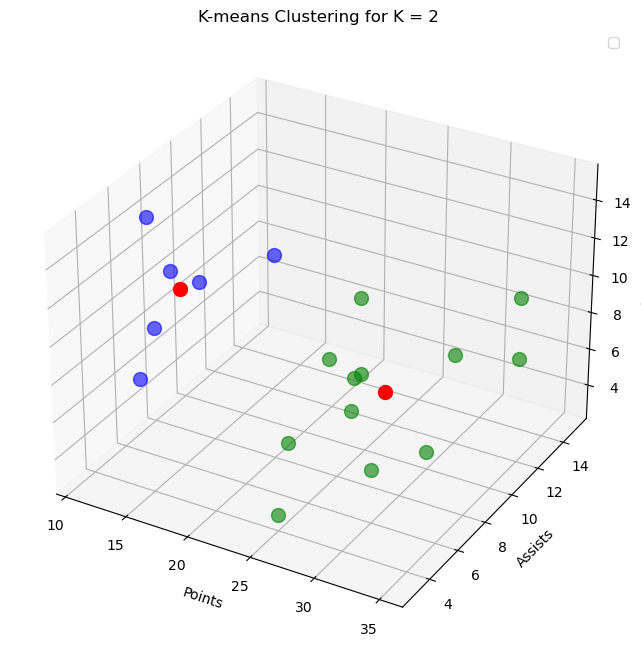

In [28]:
labels,centers = k_means_manhattan(X,k=2)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 0:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 2')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### Minkowski

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


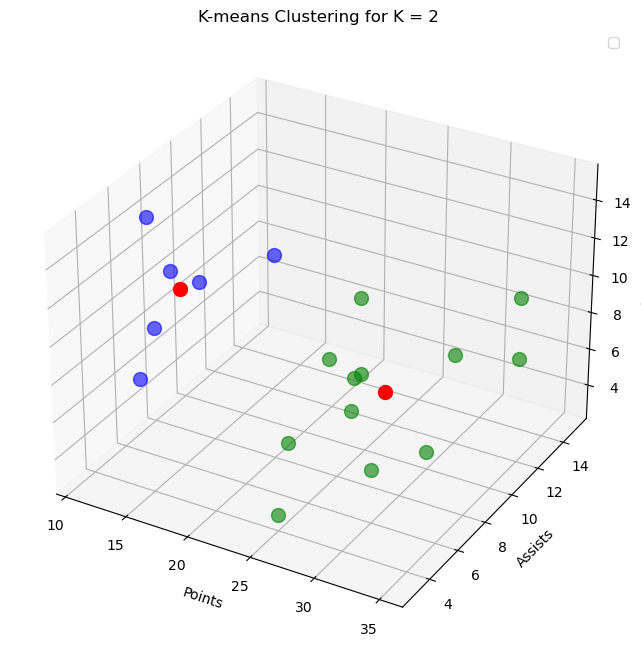

In [29]:
labels,centers = k_means_minkowski(X,k=2)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 0:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 2')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### For K = 3

### Manhatten

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


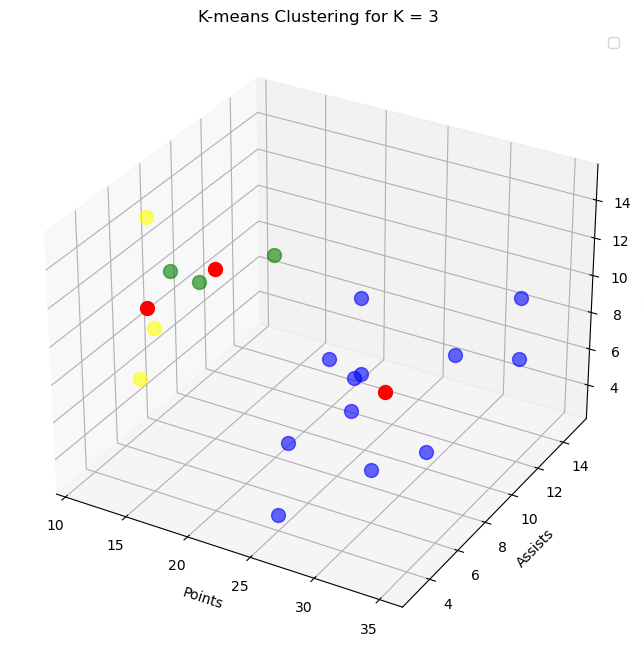

In [34]:
labels,centers = k_means_manhattan(X,k=3)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 2:
        ax.scatter(point[0], point[1], point[2], c='yellow' , s=100,alpha=0.6)
    elif label == 1:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

# Scatter plot of the cluster centers
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 3')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### Minkowski

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


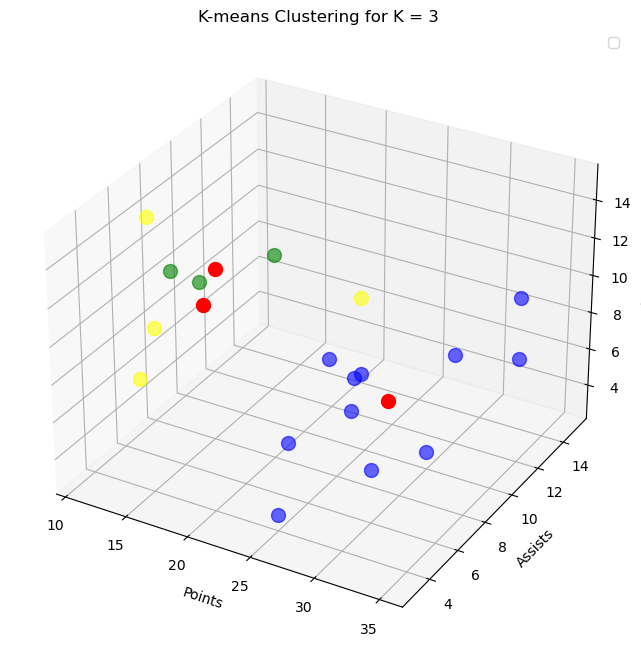

In [35]:
labels,centers = k_means_minkowski(X,k=3)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 2:
        ax.scatter(point[0], point[1], point[2], c='yellow' , s=100,alpha=0.6)
    elif label == 1:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

# Scatter plot of the cluster centers
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 3')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### For K = 4

### Manhatten

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


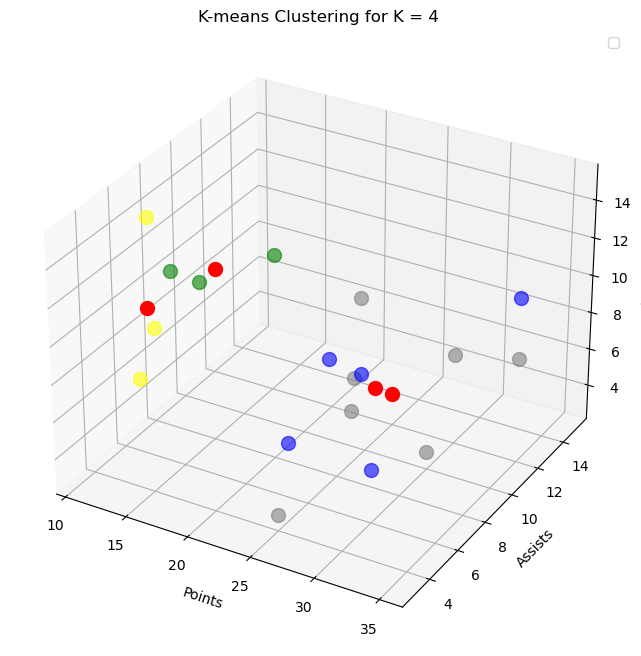

In [36]:
labels,centers = k_means_manhattan(X,k=4)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 3:
        ax.scatter(point[0], point[1], point[2], c='gray' , s=100,alpha=0.6)
    elif label == 2:
        ax.scatter(point[0], point[1], point[2], c='yellow' , s=100,alpha=0.6)
    elif label == 1:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

# Scatter plot of the cluster centers
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 4')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### Minkowski

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


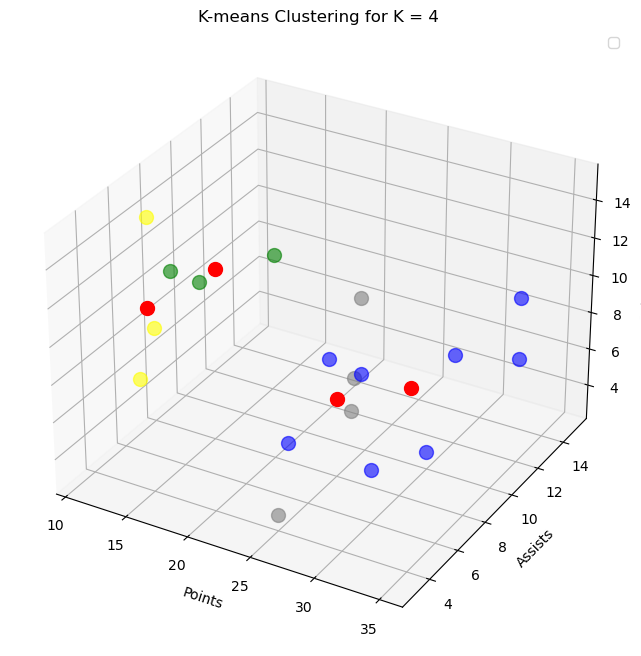

In [37]:
labels,centers = k_means_minkowski(X,k=4)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for point,label in zip(X,labels):
    if label == 3:
        ax.scatter(point[0], point[1], point[2], c='gray' , s=100,alpha=0.6)
    elif label == 2:
        ax.scatter(point[0], point[1], point[2], c='yellow' , s=100,alpha=0.6)
    elif label == 1:
        ax.scatter(point[0], point[1], point[2], c='blue' , s=100,alpha=0.6)
    else:
        ax.scatter(point[0], point[1], point[2], c='green' , s=100,alpha=0.6)

# Scatter plot of the cluster centers
for center in centers:
    ax.scatter(center[0], center[1], center[2], c='red' , s=100)

# Adding labels and title
ax.set_title('K-means Clustering for K = 4')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
ax.legend()

### SSE Graph

### Manhattan

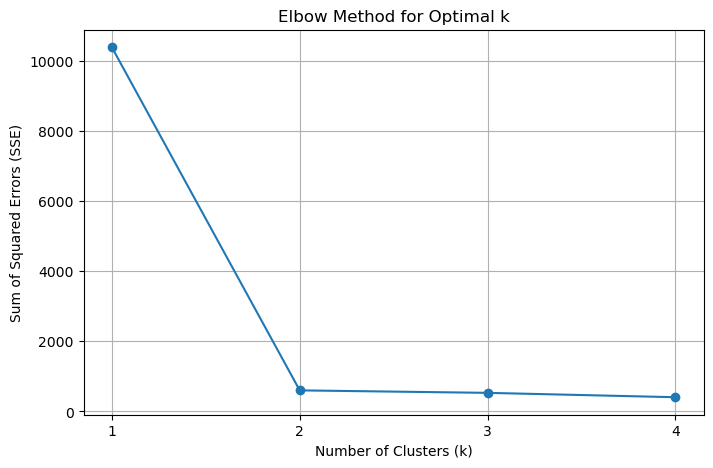

In [38]:
def calculate_sse(centers, labels, X):
    sse = 0
    for i, point in enumerate(X):
        center = centers[labels[i]]
        sse += np.sum((point - center) ** 2)
    return sse

k_values = range(1, 5)
sse_values = []

for k_value in k_values:
    labels,centers = k_means_manhattan(X, k=k_value)
    sse = calculate_sse(centers, labels, X)
    sse_values.append(sse)

    # Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Minkowski

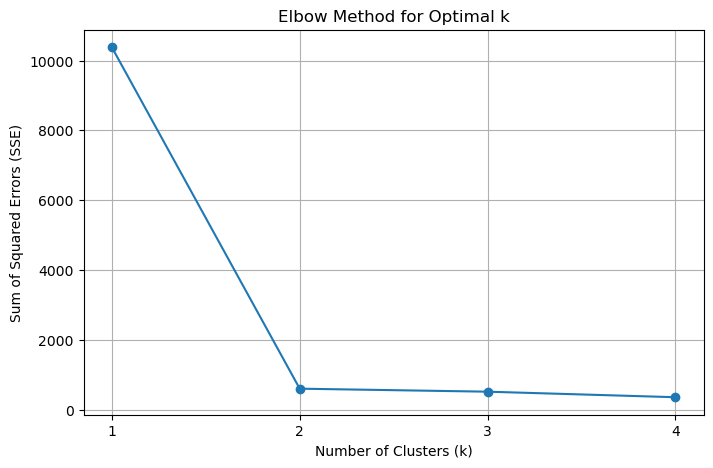

In [40]:
def calculate_sse(centers, labels, X):
    sse = 0
    for i, point in enumerate(X):
        center = centers[labels[i]]
        sse += np.sum((point - center) ** 2)
    return sse

k_values = range(1, 5)
sse_values = []

for k_value in k_values:
    labels,centers = k_means_minkowski(X, k=k_value)
    sse = calculate_sse(centers, labels, X)
    sse_values.append(sse)

    # Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()